In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 1

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import os, glob
import pandas as pd
import numpy as np
from scipy import stats
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# import the necessary packages
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
import statsmodels.formula.api as smfapi
import statsmodels.api as smapi

from Utils.DataUtils import *
from Utils.UtilsViz import *
from Utils.pipeline_utils import *


# Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [2]:
data_train = pd.read_csv("./data/train.csv", index_col="Id")
display(data_train.shape, data_train.head())

(1460, 80)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
nan_df = analyse_nans(data_train)
nan_df_t = nan_df.T
nan_df_t.sort_values(by="percentage", inplace=True, ascending=False)
nan_df_t = nan_df_t[nan_df_t["percentage"]!=0]

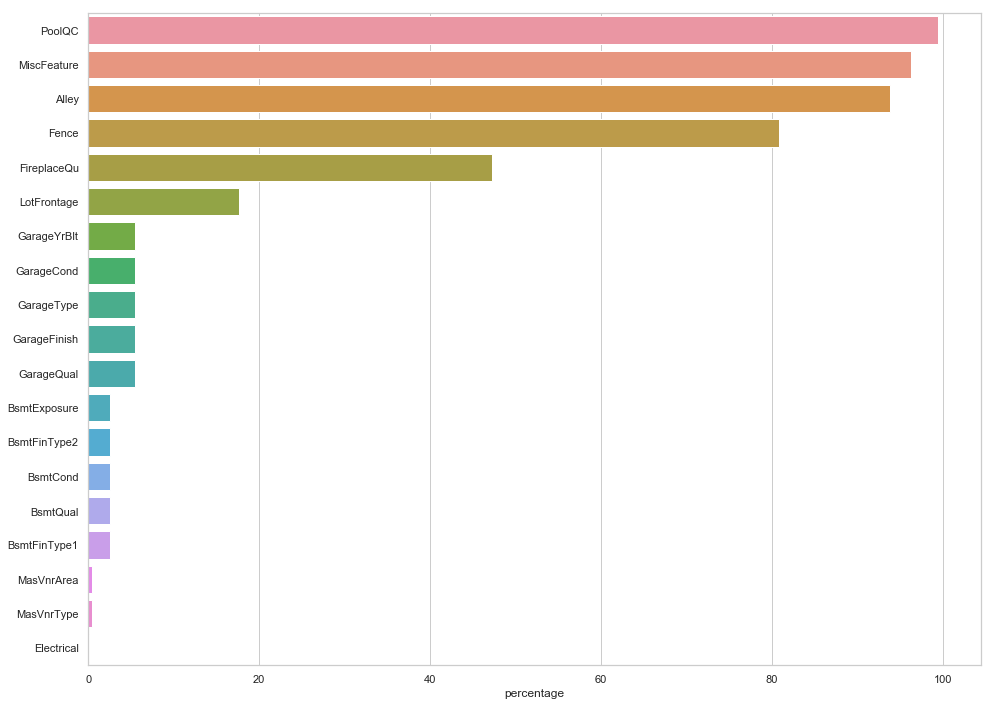

In [4]:
f, ax = plt.subplots(1,1,figsize=(16,12))
g = sns.barplot(y=nan_df_t.index, x=nan_df_t.percentage, ax=ax)

# MasVnrType 

Masonry Veneer Type

In [5]:
nan_df["MasVnrType"]

total                                                  8
percentage                                           0.5
idx_list      [235, 530, 651, 937, 974, 978, 1244, 1279]
Name: MasVnrType, dtype: object

In [6]:
data_train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

For this column, it may be safe to categorize the missing values as <i>None</i> , which is the most prevalent kind of category

In [7]:
data_train["MasVnrType"].fillna(data_train["MasVnrType"].value_counts().index[0], inplace=True)

# MasVnrArea

Masonry Veneer Area

In [8]:
data_train[data_train["MasVnrArea"].isna()][["MasVnrType", "MasVnrArea"]]

,MasVnrType,MasVnrArea
Id,,
235,None,NaN
530,None,NaN
651,None,NaN
937,None,NaN
974,None,NaN
978,None,NaN
1244,None,NaN
1279,None,NaN


Since they correspond to None, We can assume the Area is 0

In [9]:
data_train["MasVnrArea"].fillna(0, inplace=True)

# BsmtCols


- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area

In [10]:
bsmt_cols = [c for c in data_train.columns if "bsmt" in c.lower()]
# data_train[data_train["BsmtQual"].isna()][bsmt_cols]

In [11]:
bsmt_nan_df = analyse_nans(data_train[bsmt_cols])
bsmt_nan_df

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
total,37,37,38,37,0,38,0,0,0,0,0
percentage,2.5,2.5,2.6,2.5,0,2.6,0,0,0,0,0
idx_list,"[18, 40, 91, 103, 157, 183, 260, 343, 363, 372, 393, 521, 533, 534, 554, 647, 706, 737, 750, 779...","[18, 40, 91, 103, 157, 183, 260, 343, 363, 372, 393, 521, 533, 534, 554, 647, 706, 737, 750, 779...","[18, 40, 91, 103, 157, 183, 260, 343, 363, 372, 393, 521, 533, 534, 554, 647, 706, 737, 750, 779...","[18, 40, 91, 103, 157, 183, 260, 343, 363, 372, 393, 521, 533, 534, 554, 647, 706, 737, 750, 779...",[],"[18, 40, 91, 103, 157, 183, 260, 333, 343, 363, 372, 393, 521, 533, 534, 554, 647, 706, 737, 750...",[],[],[],[],[]


Exploring the data, filling the missing values with the most common occuring value count will be the best approach

In [12]:
for bc in bsmt_cols:
    data_train[bc].fillna(data_train[bc].value_counts().index[0], inplace=True)

# Garage columns

- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition

In [13]:
grg_cols = [c for c in data_train.columns if "garage" in c.lower()]
display(
    data_train[grg_cols].head(),
    analyse_nans(data_train[grg_cols])
)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
1,Attchd,2003.0,RFn,2,548,TA,TA
2,Attchd,1976.0,RFn,2,460,TA,TA
3,Attchd,2001.0,RFn,2,608,TA,TA
4,Detchd,1998.0,Unf,3,642,TA,TA
5,Attchd,2000.0,RFn,3,836,TA,TA


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
total,81,81,81,0,0,81,81
percentage,5.5,5.5,5.5,0,0,5.5,5.5
idx_list,"[40, 49, 79, 89, 90, 100, 109, 126, 128, 141, 149, 156, 164, 166, 199, 211, 242, 251, 288, 292, ...","[40, 49, 79, 89, 90, 100, 109, 126, 128, 141, 149, 156, 164, 166, 199, 211, 242, 251, 288, 292, ...","[40, 49, 79, 89, 90, 100, 109, 126, 128, 141, 149, 156, 164, 166, 199, 211, 242, 251, 288, 292, ...",[],[],"[40, 49, 79, 89, 90, 100, 109, 126, 128, 141, 149, 156, 164, 166, 199, 211, 242, 251, 288, 292, ...","[40, 49, 79, 89, 90, 100, 109, 126, 128, 141, 149, 156, 164, 166, 199, 211, 242, 251, 288, 292, ..."


In [14]:
data_train[data_train["GarageType"].isna()][grg_cols].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,NaN,NaN,NaN,0,0,NaN,NaN
49,NaN,NaN,NaN,0,0,NaN,NaN
79,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
90,NaN,NaN,NaN,0,0,NaN,NaN


In [15]:
data_train["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

We can assume the GarageType is Attached considering that's the most common kind

In [16]:
data_train["GarageType"].fillna(data_train["GarageType"].value_counts().index[0], inplace=True)

The year the garage was built cannot be less than the year the house was built

Variables : 
- YearBuilt: Original construction date
- YearRemodAdd: Year remodel date

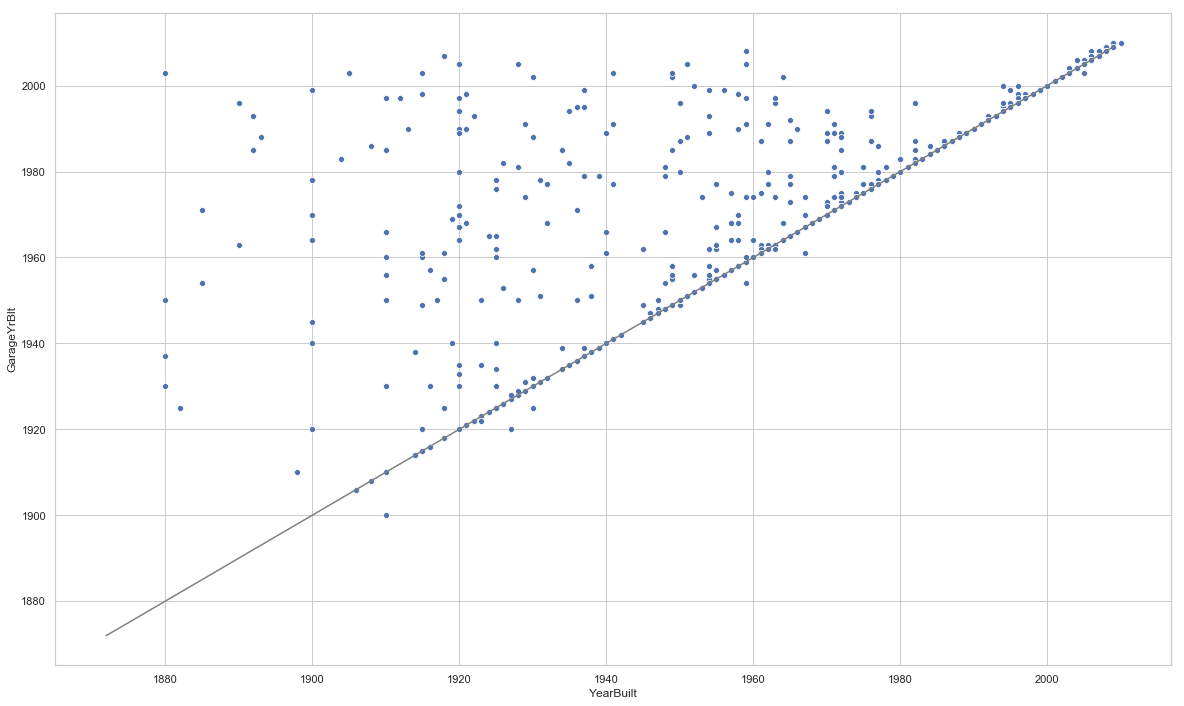

In [17]:
f, ax = plt.subplots(1,1,figsize=(20,12))
g = sns.scatterplot(x="YearBuilt", y="GarageYrBlt", data=data_train, ax=ax)
g = sns.lineplot(x=range(data_train["YearBuilt"].min(), data_train["YearBuilt"].max()), 
                 y=range(data_train["YearBuilt"].min(), data_train["YearBuilt"].max()), ax=ax,
                color="grey")

What kind of houses started off as a garage? (Except startups ba dum tss)

In [18]:
q = "YearBuilt > GarageYrBlt"
data_train.query(q)[["YearBuilt", "BldgType", "HouseStyle", "YearRemodAdd", "GarageYrBlt"]]

,YearBuilt,BldgType,HouseStyle,YearRemodAdd,GarageYrBlt
Id,,,,,
30,1927,1Fam,1Story,1950,1920.0
94,1910,2fmCon,2.5Unf,1998,1900.0
325,1967,1Fam,SLvl,2007,1961.0
601,2005,1Fam,2Story,2005,2003.0
737,1950,Duplex,1Story,1950,1949.0
1104,1959,1Fam,1Story,1959,1954.0
1377,1930,1Fam,1Story,1950,1925.0
1415,1923,1Fam,1.5Fin,2000,1922.0
1419,1963,1Fam,1Story,1963,1962.0


Fill Garage year with the same as house year

In [19]:
data_train["GarageYrBlt"].fillna(data_train["YearBuilt"], inplace=True)

What finishing do Garages have?

In [20]:
data_train["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

Fill with the most occuring once again

In [21]:
data_train["GarageFinish"].fillna(data_train["GarageFinish"].value_counts().index[0], inplace=True)

What quality ratings are Garages given?

In [22]:
data_train["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [23]:
data_train["GarageQual"].fillna(data_train["GarageQual"].value_counts().index[0], inplace=True)

What condition is the Garage in?

In [24]:
data_train["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [25]:
data_train["GarageCond"].fillna(data_train["GarageCond"].value_counts().index[0], inplace=True)

#  LotFrontage

LotFrontage: Linear feet of street connected to property

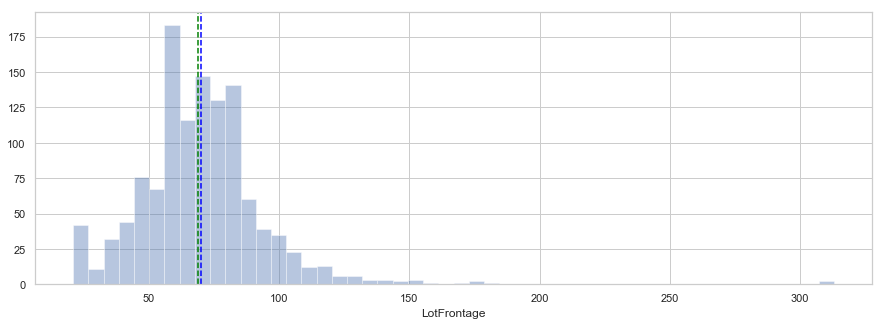

In [26]:
f, ax = plt.subplots(1,1,figsize=(15,5))
g = sns.distplot(data_train["LotFrontage"].dropna(), ax=ax, kde=False)
l = g.axvline(data_train["LotFrontage"].mean(), linestyle="--", color="blue")
l = g.axvline(data_train["LotFrontage"].median(), linestyle="--", color="green")

Fill with median 

In [27]:
data_train["LotFrontage"].fillna(data_train["LotFrontage"].median(), inplace=True)

# FireplaceQu

FireplaceQu: Fireplace quality

In [28]:
data_train["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

My assumption is that the places do NOT have a fireplace

In [29]:
data_train["FireplaceQu"].fillna("None", inplace=True)

# Electrical

In [30]:
data_train["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [31]:
data_train["Electrical"].fillna(data_train["Electrical"].value_counts().index[0], inplace=True)
data_train["Electrical"].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

# Drop the columns that have more than 80% missing values

In [32]:
nan_df2 = analyse_nans(data_train).T
cols_to_drop = nan_df2.loc[nan_df2["percentage"] >= 80, :].index
for dc in cols_to_drop:
    data_train.drop(dc, inplace=True, axis=1)

In [33]:
analyse_nans(data_train)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
idx_list,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]


In [34]:
data_train.to_csv("./data/train_na_cleaned.csv")